## Script's Goals

This script is used to explore the data and get informations like the structure of the data, the mean gene expression, the distribution, and to check if there is missing values in the dataset.

 ## Import packages

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Define Function

In [2]:
def charge_tsv(path):
    # function to load a tsv_file in a pandas table
    df = pd.read_csv(path, sep='\t', header=0, index_col=0)
    return df

In [3]:
def sum_row(df):
    # function to calculate the sum of each row of a dataframe
    row_sums = df.sum(axis=1)
    return row_sums

In [4]:
def sum_col(df):
    # function to calculate the sum of each column of a dataframe
    row_col = df.sum(axis=0)
    return row_col

In [5]:
def mean_expression(df):
    # function to calculate the mean expression of genes in a dataframe
    mean = df.values.mean()
    return mean

In [6]:
def distribution(series, name_x, name_df, log_transform=False):
    """
    Function to plot the distribution of a series with an optional log transformation.

    Args:
    - series (pd.Series or np.ndarray): The data series to plot.
    - name_x (str): The label for the x-axis.
    - name_df (str): The name of the dataframe for the plot title.
    - log_transform (bool): Whether to apply a log transformation to the series.
    """
    if log_transform:
        series = np.log1p(series)  # Apply log1p transformation
    
    plt.figure(figsize=(10, 6))
    sns.histplot(series, bins=50, kde=False)
    plt.xlabel(name_x)
    plt.ylabel('Frequency')
    title = f'Distribution of {name_x} in the dataframe {name_df}'
    if log_transform:
        title += ' (Log Transformed)'
    plt.title(title)
    plt.show()
    return

# Explore data

## Load the data

In [7]:
healthy_train = charge_tsv("/home/mc202900/datasets_scienta/healthy_train_data.tsv")
healthy_test = charge_tsv("/home/mc202900/datasets_scienta/healthy_test_data.tsv")
ra_train = charge_tsv("/home/mc202900/datasets_scienta/ra_train_data.tsv")
ra_test = charge_tsv("/home/mc202900/datasets_scienta/ra_test_data.tsv")
sle_train = charge_tsv("/home/mc202900/datasets_scienta/sle_train_data.tsv")
sle_test = charge_tsv("/home/mc202900/datasets_scienta/sle_test_data.tsv")

In [8]:
list_dataset=[]
list_dataset.append(healthy_train)
list_dataset.append(healthy_test)
list_dataset.append(ra_train)
list_dataset.append(ra_test)
list_dataset.append(sle_train)
list_dataset.append(sle_test)

In [9]:
datasets = {
    "healthy_train": healthy_train,
    "healthy_test": healthy_test,
    "ra_train": ra_train,
    "ra_test": ra_test,
    "sle_train" : sle_train,
    "sle_test" : sle_test
}

## Structure of the data

In [10]:
print(sle_test.head())

                      DDX11L1  WASH7P  MIR6859-1  MIR1302-2HG  MIR1302-2  \
GSE116006_GSM3206469    1.707   6.687      3.859          0.0        0.0   
GSE116006_GSM3206471    1.589  13.850      9.352          0.0        0.0   
GSE116006_GSM3206472    3.377  19.550     20.660          0.0        0.0   
GSE116006_GSM3206473    1.614  12.260     13.480          0.0        0.0   
GSE116006_GSM3206474    1.724  11.580      7.335          0.0        0.0   

                      FAM138A  OR4F5  WASH9P  LOC729737  DDX11L17  ...  \
GSE116006_GSM3206469      0.0    0.0   2.627      29.77     1.987  ...   
GSE116006_GSM3206471      0.0    0.0   2.025      76.44     1.608  ...   
GSE116006_GSM3206472      0.0    0.0   1.326      44.40     4.667  ...   
GSE116006_GSM3206473      0.0    0.0   1.967      50.35     1.906  ...   
GSE116006_GSM3206474      0.0    0.0   1.635      16.58     2.134  ...   

                         ND4   TRNH   TRNS2  TRNL2    ND5    ND6   TRNE  \
GSE116006_GSM3206469  1

In [11]:
for name, df in datasets.items():
    row, col = df.shape
    print(f'The dataset {name} has {row} rows and {col} columns')

The dataset healthy_train has 302 rows and 24403 columns
The dataset healthy_test has 100 rows and 24403 columns
The dataset ra_train has 1587 rows and 37691 columns
The dataset ra_test has 330 rows and 37691 columns
The dataset sle_train has 1332 rows and 37691 columns
The dataset sle_test has 465 rows and 37691 columns


We observe that the datasets are organized with gene names as columns and sample names as rows. Each cell contains the expression level as a float, indicating that the data has already been pre-processed.

Additionally, each dataset has a different number of rows. For each health status, the data has been split approximately 75% for the training set and 25% for the test set. However, the total number of samples in the healthy datasets is significantly lower than in the other health status datasets, which may lead to decreased model performance when identifying these samples with a machine learning model.

We also notice that the number of columns differs between the healthy datasets and the RA/SLE datasets, meaning the number of genes for which expression levels were measured is not the same. For the remainder of the analysis, we will need to align the genes across each dataset to enable a consistent comparison. We will also need to reduce the number of genes that we will put in the machine learning model to avoid the overfitting and to simplify the model.

## Missing values

In [12]:
# Check if there is missing values
for name, df in datasets.items():
    if df.isnull().values.any():
        print(f"There is missing values in the dataset {name}.")
    else:
        print(f"There is not missing values in the dataset {name}.")


There is not missing values in the dataset healthy_train.
There is not missing values in the dataset healthy_test.
There is not missing values in the dataset ra_train.
There is not missing values in the dataset ra_test.
There is not missing values in the dataset sle_train.
There is not missing values in the dataset sle_test.


No missing values in the datasets !

## Mean expression

In [13]:
for name, df in datasets.items():
    mean=mean_expression(df)
    print(f'The mean expression of the dataset {name} is {mean}')
    

The mean expression of the dataset healthy_train is 22.131131721303404
The mean expression of the dataset healthy_test is 22.38199543470064
The mean expression of the dataset ra_train is 12.67407394269622
The mean expression of the dataset ra_test is 16.191836522343138
The mean expression of the dataset sle_train is 12.912584429133412
The mean expression of the dataset sle_test is 12.096644664836841


We observe that the mean expression levels vary across the different datasets. For the healthy and SLE datasets, the training and test sets have approximately the same mean expression levels. However, for the RA dataset, the mean expression differs between the training and test sets, suggesting a potential imbalance in data distribution during the train-test split.

The healthy datasets show a higher mean expression than the RA and SLE datasets. In conclusion, further analyses will require normalization and/or batch effect correction to enable a fair comparison across samples and datasets.

## Distribution of gene appearance

A1BG          178.14436
NAT2            2.19222
ADA          3504.13672
CDH2            0.00000
AKT3          231.62525
               ...     
PTBP3        5671.77941
KCNE2           0.00000
DGCR2       10419.96355
CASP8AP2      156.39321
SCO2          529.97935
Length: 24403, dtype: float64
34980652.34068
0.0


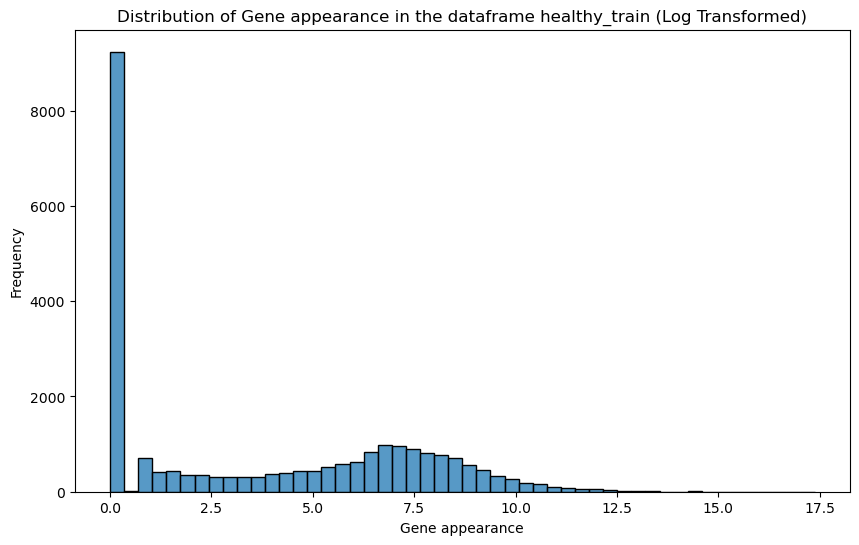

A1BG          58.43529
NAT2           0.00000
ADA         1286.26807
CDH2           0.00000
AKT3          63.85977
               ...    
PTBP3       1797.81159
KCNE2          0.00000
DGCR2       3393.16181
CASP8AP2      45.25907
SCO2         201.94458
Length: 24403, dtype: float64
12005151.670039998
0.0


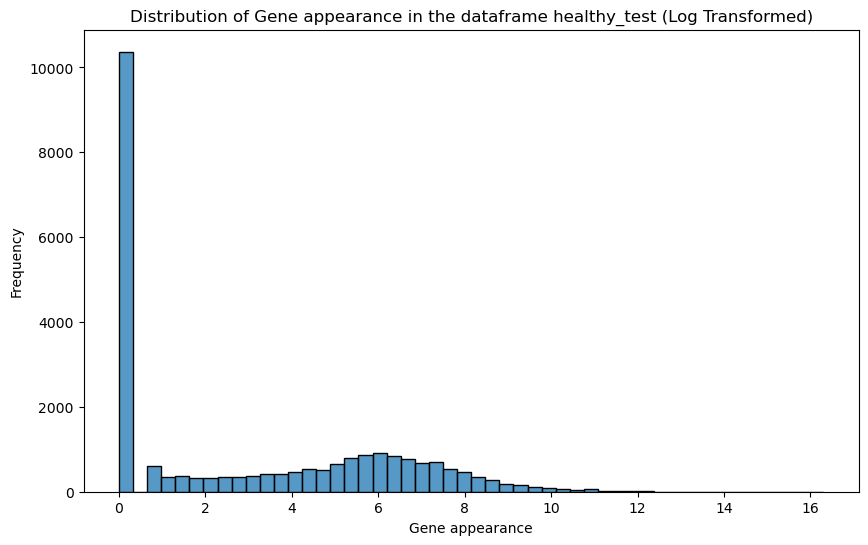

DDX11L1           1075.124
WASH7P           25940.907
MIR6859-1        21151.290
MIR1302-2HG          9.532
MIR1302-2            9.456
                  ...     
ND6            2309191.667
TRNE           1300250.010
CYTB           3255554.575
TRNT            202560.214
TRNP            785790.236
Length: 37691, dtype: float64
21631272.248999998
0.0


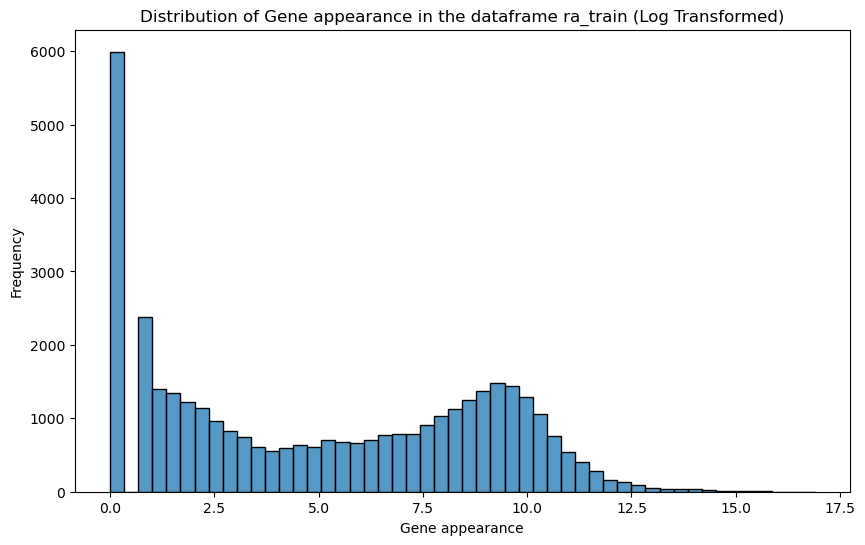

DDX11L1           0.000
WASH7P         8843.717
MIR6859-1         0.000
MIR1302-2HG       0.000
MIR1302-2         0.000
                 ...   
ND6              37.825
TRNE             40.535
CYTB            131.081
TRNT              4.819
TRNP              0.000
Length: 37691, dtype: float64
17639616.0
0.0


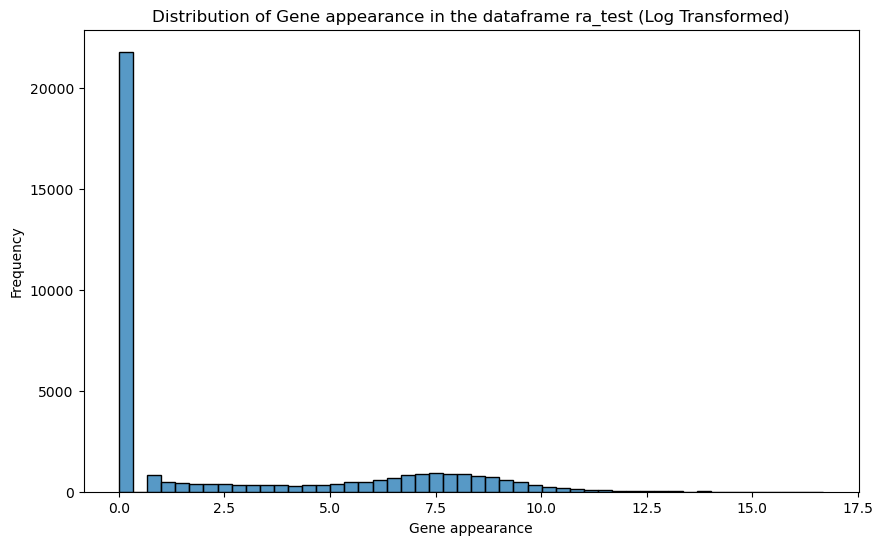

DDX11L1            423.051
WASH7P           11762.442
MIR6859-1         8300.184
MIR1302-2HG          9.279
MIR1302-2            3.194
                  ...     
ND6            1597378.297
TRNE            767859.598
CYTB           3139883.859
TRNT            242979.596
TRNP            715040.513
Length: 37691, dtype: float64
19322764.54
0.0


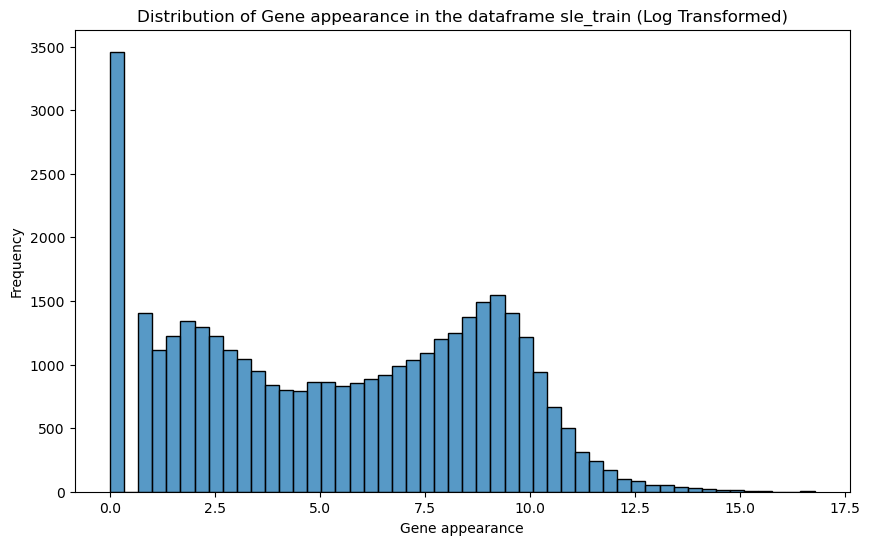

DDX11L1           725.087
WASH7P           8431.504
MIR6859-1        7295.534
MIR1302-2HG         0.000
MIR1302-2           0.000
                  ...    
ND6            345355.310
TRNE           199907.180
CYTB           530277.800
TRNT            24684.269
TRNP            83049.480
Length: 37691, dtype: float64
11854639.0
0.0


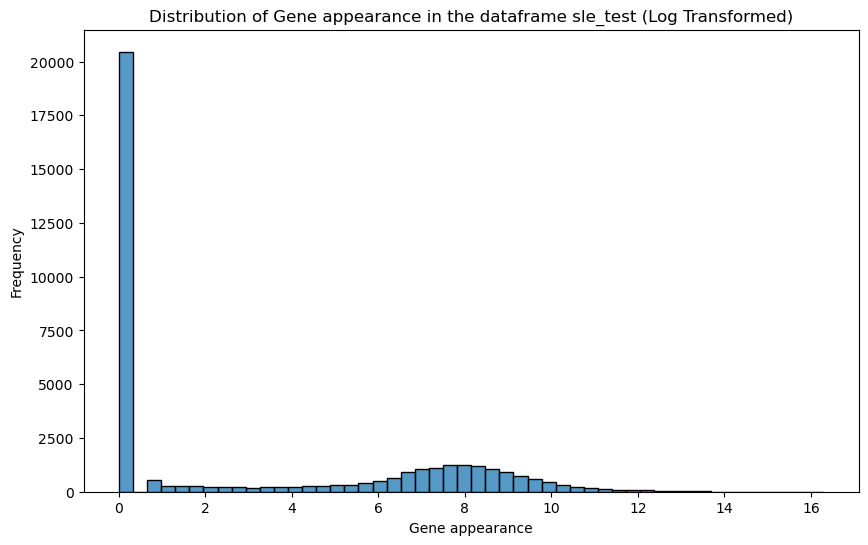

In [16]:
for name, df in datasets.items():
    c_sum=sum_col(df)
    print(c_sum)
    print(max(c_sum))
    print(min(c_sum))
    distribution(c_sum, "Gene appearance", name, True)

We observe that gene appearance vary greatly depending on the gene, ranging from 0 to 17.5 (Log_tranformed). Most genes have gene appearance = 0. Normalization will be crucial to mitigate the impact of outliers and extreme values.

## Distribution of read per sample

Whole blood_GTEX-111YS-0006-SM-5NQBE    604742.51543
Whole blood_GTEX-1122O-0005-SM-5O99J    423266.25903
Whole blood_GTEX-1128S-0005-SM-5P9HI    566177.69634
Whole blood_GTEX-113IC-0006-SM-5NQ9C    455346.17040
Whole blood_GTEX-11DXW-0006-SM-5NQ7Y    545201.24398
                                            ...     
Whole blood_GTEX-ZTX8-0006-SM-4YCE4     532837.20233
Whole blood_GTEX-ZVP2-0005-SM-51MRK     526261.59427
Whole blood_GTEX-ZVT4-0006-SM-57WB8     552976.99899
Whole blood_GTEX-ZVZP-0006-SM-51MSW     475398.34443
Whole blood_GTEX-ZXG5-0005-SM-57WCN     450791.65165
Length: 302, dtype: float64
731745.9343400022
322137.81005999993


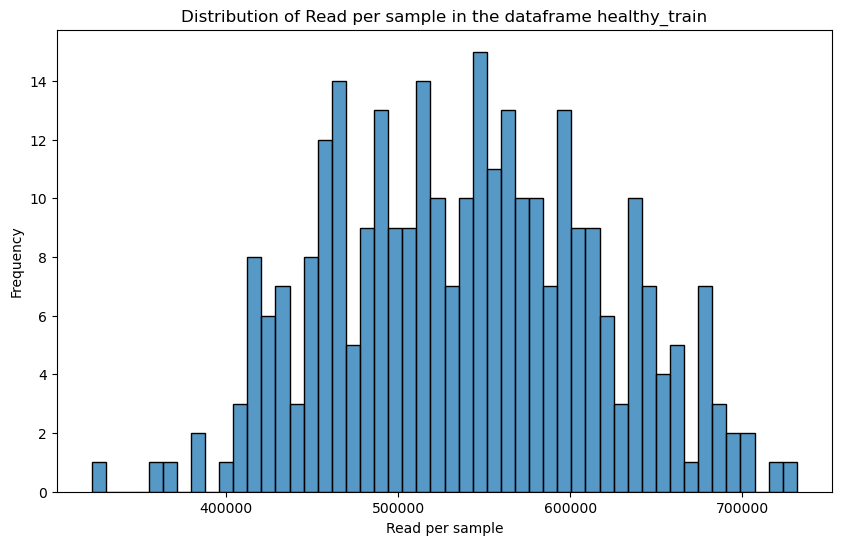

Whole blood_GTEX-QEG5-0006-SM-2I5FZ     559111.88474
Whole blood_GTEX-1399R-0006-SM-5N9FR    514245.83470
Whole blood_GTEX-12WSL-0005-SM-5NQAD    548208.01430
Whole blood_GTEX-13VXT-0005-SM-5N9F3    542987.81993
Whole blood_GTEX-1F75I-0005-SM-ADEHC    686772.92005
                                            ...     
Whole blood_GTEX-1HSGN-0006-SM-ACKVH    649287.86752
Whole blood_GTEX-1S82Y-0005-SM-DO123    696515.38724
Whole blood_GTEX-1211K-0006-SM-5MR53    479117.20299
Whole blood_GTEX-1RB15-0005-SM-CL53N    652753.72427
Whole blood_GTEX-15DYW-0006-SM-7RHFR    573572.02706
Length: 100, dtype: float64
739550.4935799987
348481.0306600015


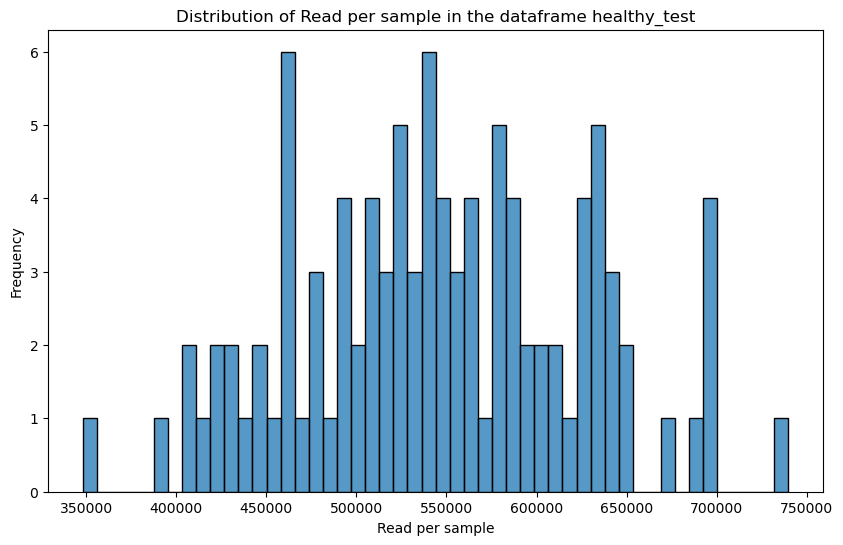

GSE183154_GSM5552159    410777.083
GSE183154_GSM5552160    420329.967
GSE183154_GSM5552161    371385.534
GSE183154_GSM5552162    411481.899
GSE135635_GSM4024030    416201.020
                           ...    
GSE199868_GSM5989867    654149.853
GSE199868_GSM5989868    480511.223
GSE199868_GSM5989869    572685.477
GSE199868_GSM5989870    479891.252
GSE199868_GSM5989871    465614.456
Length: 1587, dtype: float64
1761373.0360000022
292301.4420000011


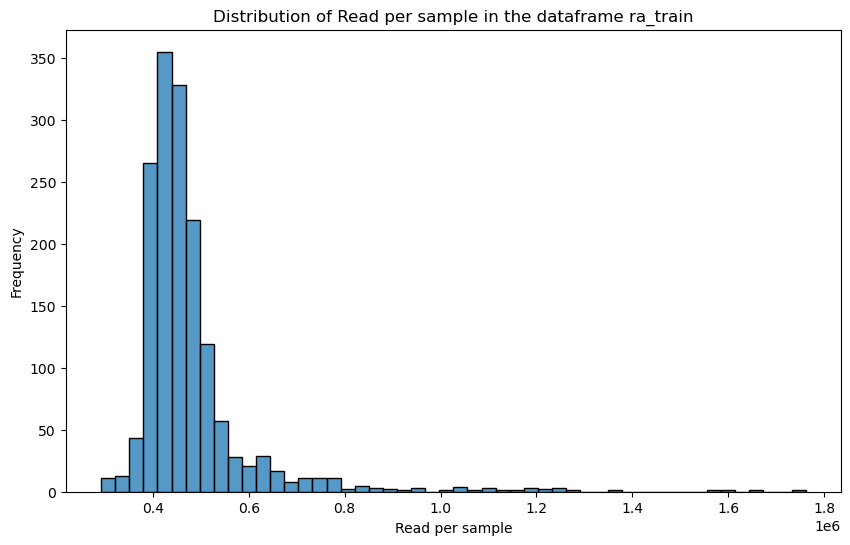

GSE118829_GSM3348321    730859.312
GSE118829_GSM3348322    703364.192
GSE118829_GSM3348323    774200.835
GSE118829_GSM3348324    739005.627
GSE118829_GSM3348325    506497.856
                           ...    
GSE118829_GSM3348652    684878.022
GSE118829_GSM3348653    518898.997
GSE118829_GSM3348654    496858.462
GSE118829_GSM3348655    496710.861
GSE118829_GSM3348656    577380.194
Length: 330, dtype: float64
1169274.5709999974
441490.272000001


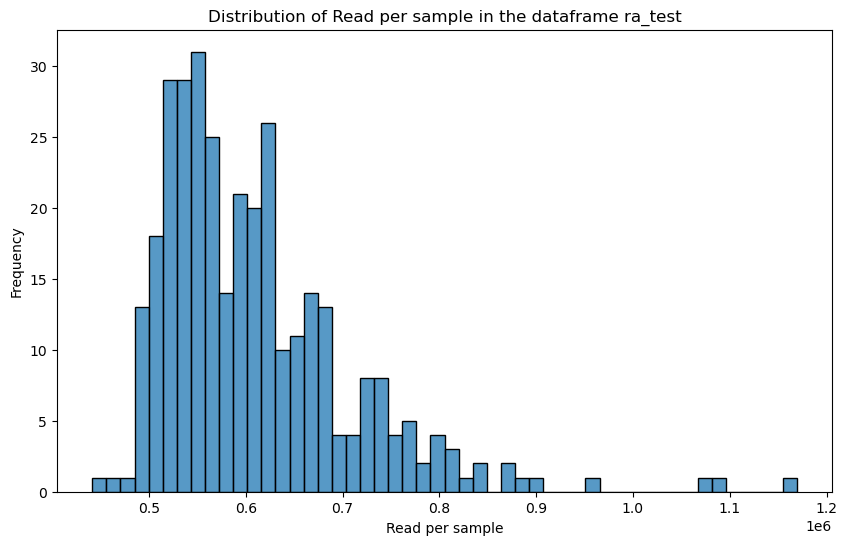

GSE63755_GSM1556699     327222.872
GSE63755_GSM1556700     349066.428
GSE63755_GSM1556701     339705.837
GSE63755_GSM1556702     337389.778
GSE63755_GSM1556703     333624.311
                           ...    
GSE122967_GSM3489317    483830.567
GSE122967_GSM3489322    403694.703
GSE122967_GSM3489323    378752.647
GSE122967_GSM3489328    395852.976
GSE122967_GSM3489329    388188.387
Length: 1332, dtype: float64
1188439.9610000043
310299.12299999903


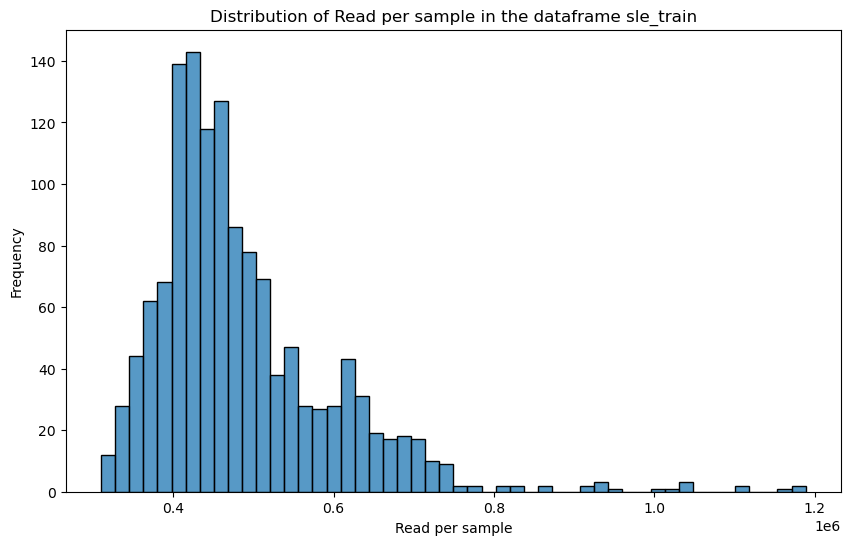

GSE116006_GSM3206469    413590.085
GSE116006_GSM3206471    449095.586
GSE116006_GSM3206472    456235.249
GSE116006_GSM3206473    424393.023
GSE116006_GSM3206474    434441.397
                           ...    
GSE116006_GSM3206933    462862.727
GSE116006_GSM3206934    473186.897
GSE116006_GSM3206935    475851.031
GSE116006_GSM3206936    431895.059
GSE116006_GSM3206937    427327.718
Length: 465, dtype: float64
694588.1539999987
386211.29900000076


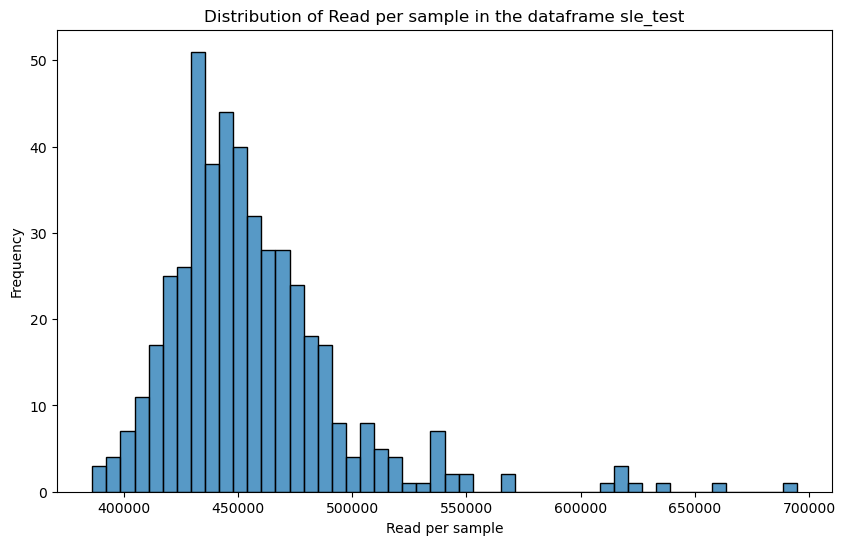

In [18]:
for name, df in datasets.items():
    r_sum=sum_row(df)
    print(r_sum)
    print(max(r_sum))
    print(min(r_sum))
    distribution(r_sum, "Read per sample", name)

We observe that for healthy datasets the read per sample ranges from 3 x 10^5 to 7 x 10^5 while for ra and sle datasets the read per sample ranges from 3 x 10^5 to 1,7 x 10^6. Moreover, all distributions appear roughly normal, but there seem to be extreme values, especially in the RA and SLE datasets. Batch effect correction and/or normalization will be essential to enable comparisons between datasets with different distributions.